!!!!!!!!

1st Exercise

1.Check for possible errors

2.If i want to reuse a parameter in cell 2, used in cell 1,i can do it, as it's value is stored in memory allocated for the whole file.
!!BUT if i change a parameter,used as argument of another one i have to recompute the value of the second in my cell (eg. i change freq of a signal)

3.We might have to reduce the freq step in the for loop cause for L = 1024 signal specimens the freq difference that we can not tell v1 and v2 apart is less than 0,019 

4.All other queries were mostly copy paste of 1.1 with other params

5.We might have to cut the DFT for transparency

6.i come across the following problem: ph1 ph2 are random so the amplitude of DFT, which is crucial when i try to tell v1 v2 apart, is rabdom too. As a result in every run i have different crucial freq difference v2 -v1 in which i can barely tell v2 - v1 apart

2nd Exercise

1.Food for thought: I have a sinusoid of N specimens. This signal is aperiodic right? Why it's N point DFT is a simple spike? Compare it with the DFT of this sunosoid,but this time windowed by a rectangular window of N specimens(this does not affect the signal in the time domain)

2.Make 2.4 iterative

3.To comment multiple lines control + /

3rd Exercise

1.Stem, Plot or Scatter?

2.Zero-Crossing rate for complex nums?



Code for first exercise

In [1]:
import os
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf

Query 1.1

Text(0.5, 1.0, 'DFT of y')

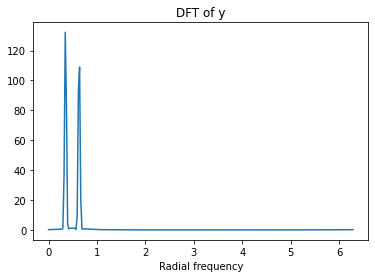

In [2]:
%matplotlib inline
L = 256
w = np.hamming(L) #Hamming window of L specimens

ph1 = random.uniform(0,2*np.pi)
ph2 = random.uniform(0,2*np.pi)
v1 = np.pi/9
v2 = np.pi/5
A1 = 1
A2 = 0.9

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

y = w * (x1 + x2)
dft = np.fft.fft(y) #DFT of windowed signal x1 + x2

N = 256  #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)
plt.plot(f,abs(dft))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

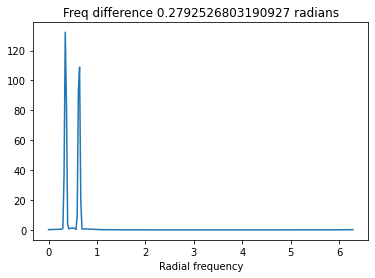

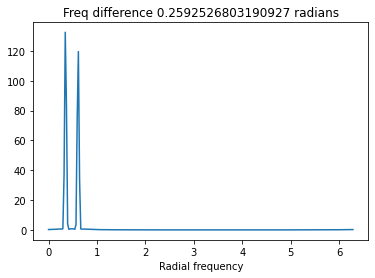

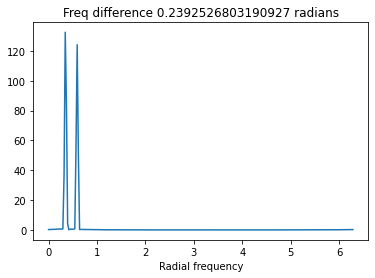

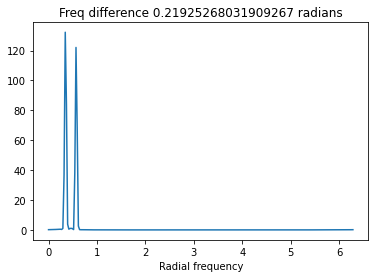

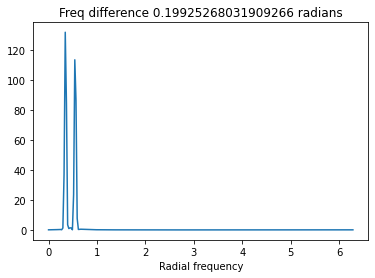

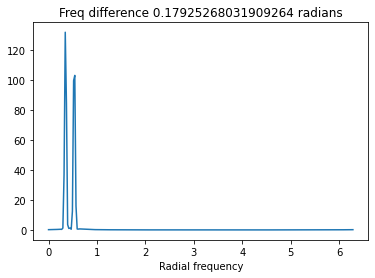

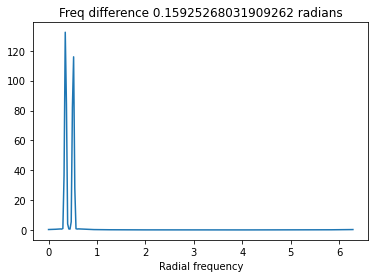

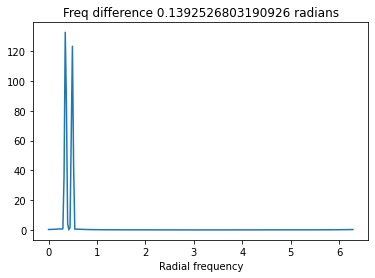

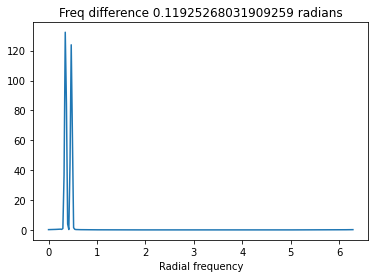

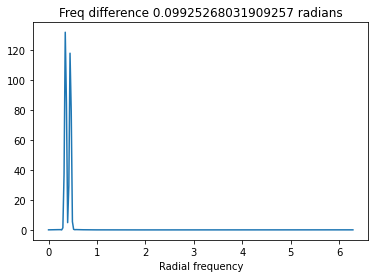

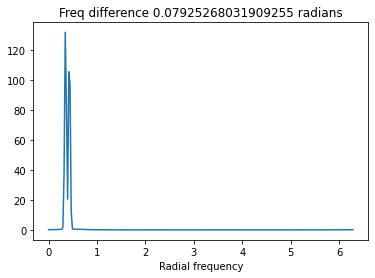

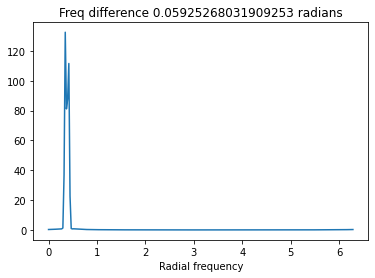

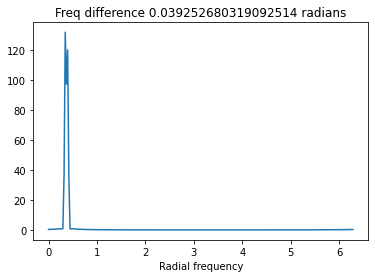

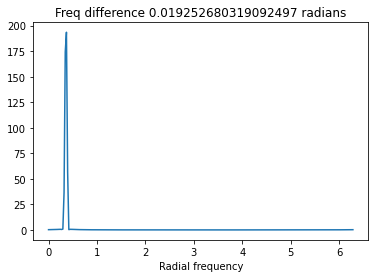

In [3]:
%matplotlib inline
v = np.arange(np.pi/5,np.pi/9,-0.02)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                  #L = 256 specimens
    dft = np.fft.fft(y)            #N = 256 specimens
    plt.figure(i)
    plt.plot(f,abs(dft))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


Query 1.2

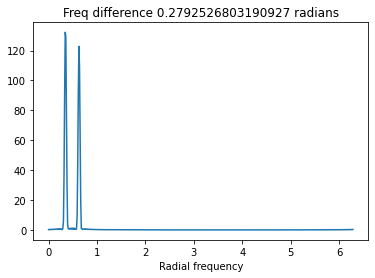

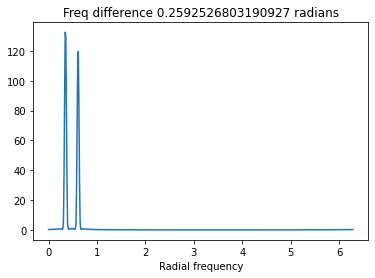

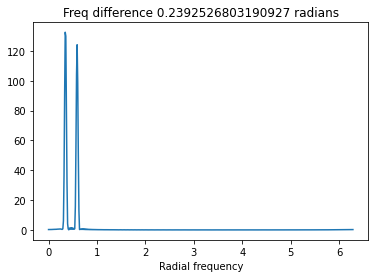

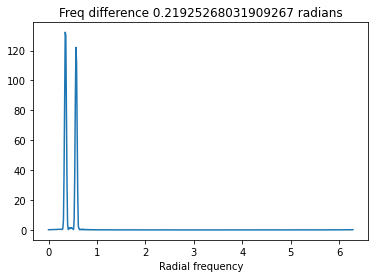

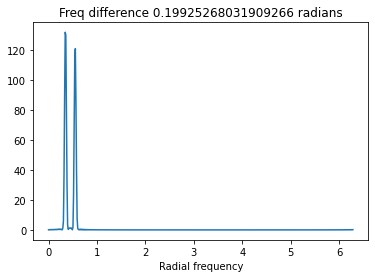

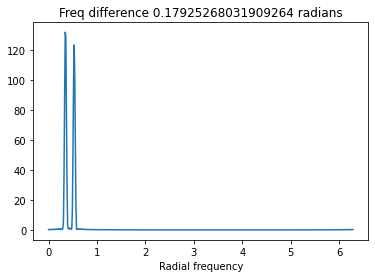

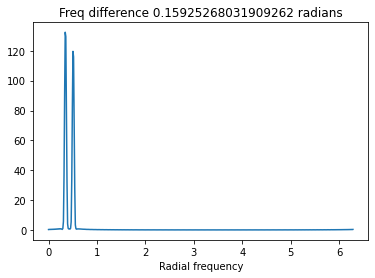

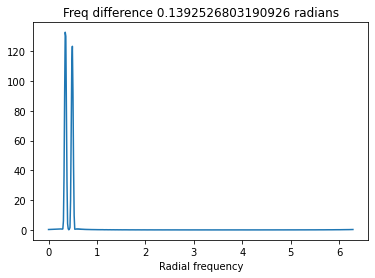

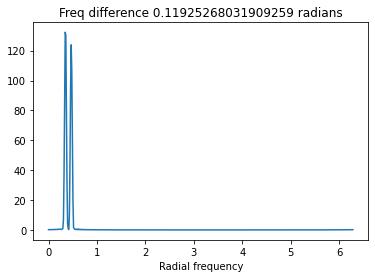

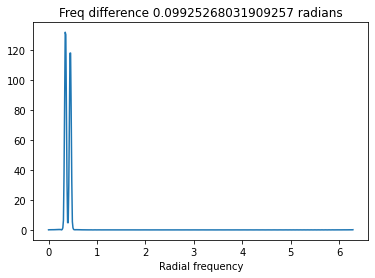

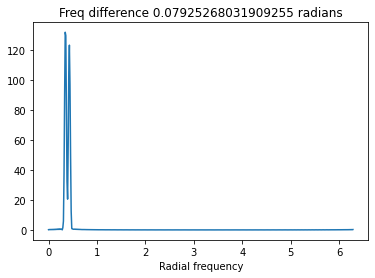

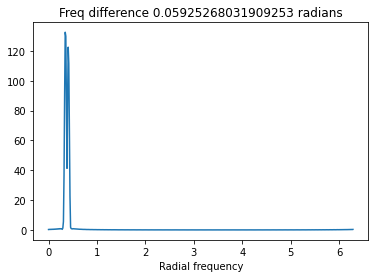

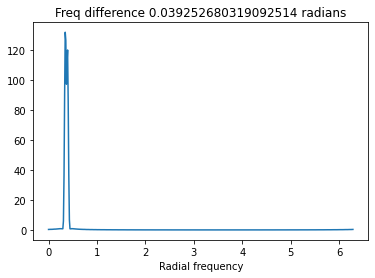

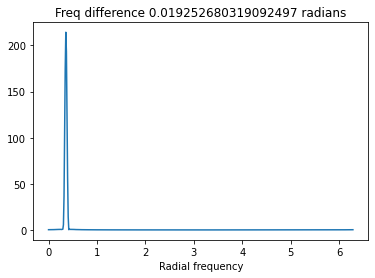

In [4]:
%matplotlib inline
v = np.arange(np.pi/5,np.pi/9,-0.02)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                     #L = 256 specimens
    
    y_pad1 = np.concatenate((y, np.zeros(256,)), axis=None) #zero padding, 512 specimens
    
    dft = np.fft.fft(y_pad1)
    
    f = np.linspace(0,2*np.pi,512)     #N = 512 specimens
    plt.figure(i)
    plt.plot(f,abs(dft))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


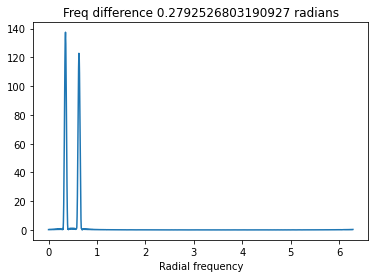

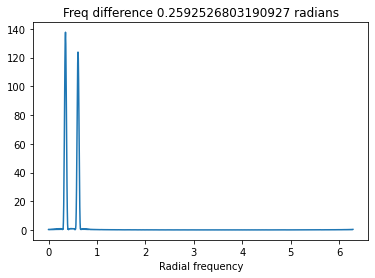

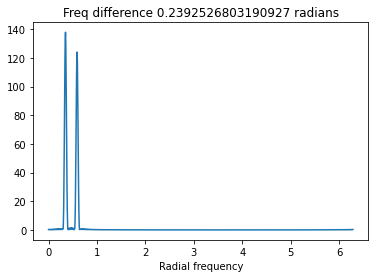

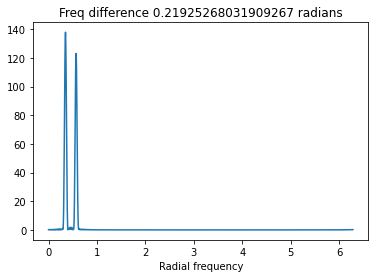

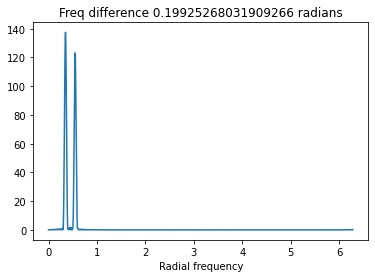

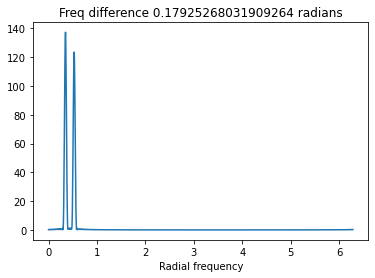

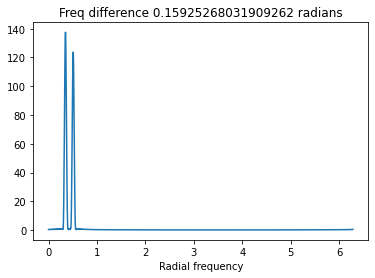

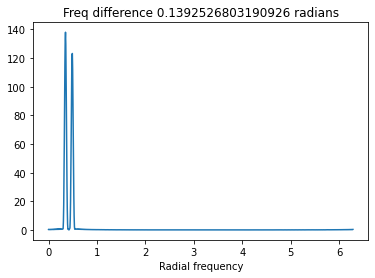

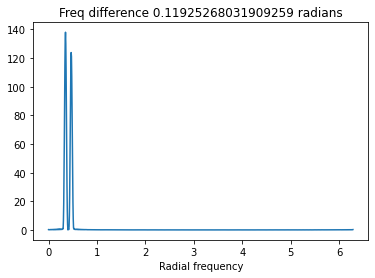

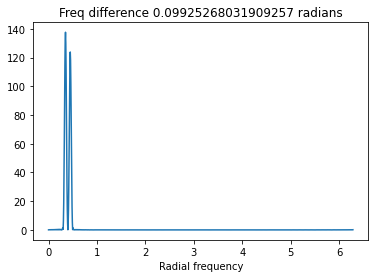

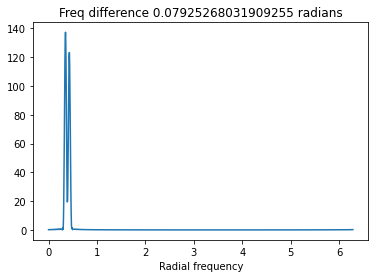

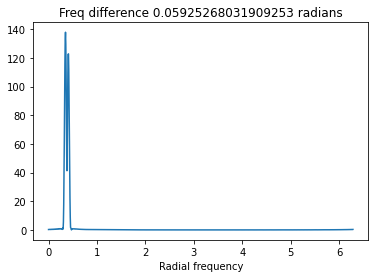

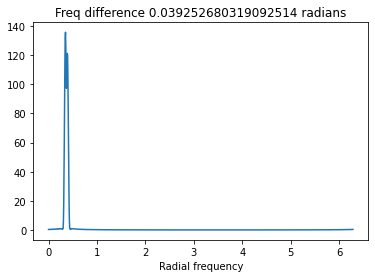

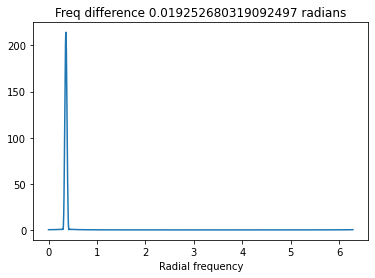

In [5]:
%matplotlib inline
v = np.arange(np.pi/5,np.pi/9,-0.02)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                     #L = 256 specimens
    
    y_pad2 = np.concatenate((y, np.zeros(768,)), axis=None) #zero padding, 1024 specimens
    
    dft = np.fft.fft(y_pad2)
    
    f = np.linspace(0,2*np.pi,1024)      #N = 1024 specimens
    plt.figure(i)
    plt.plot(f,abs(dft))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')

Query 1.3

Text(0.5, 1.0, 'DFT of y')

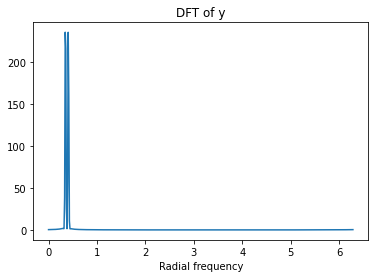

In [8]:
%matplotlib inline
L = 512
w = np.hamming(L) #Hamming window of L specimens

ph1 = random.uniform(0,2*np.pi)
ph2 = random.uniform(0,2*np.pi)
v1 = np.pi/9
v2 = np.pi/9 + 0.05925268  #i can barely tell v1 v2 apart - v2 - v1 might be less
A1 = 1
A2 = 0.9

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

y = w * (x1 + x2)
dft = np.fft.fft(y) #DFT of windowed signal x1 + x2

N = 512    #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)
plt.plot(f,abs(dft))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

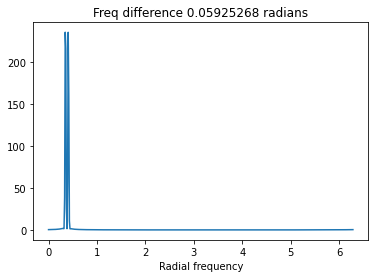

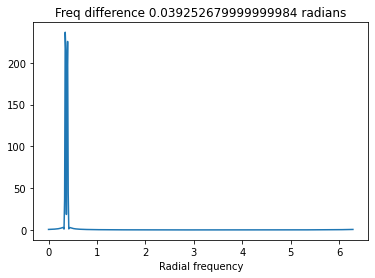

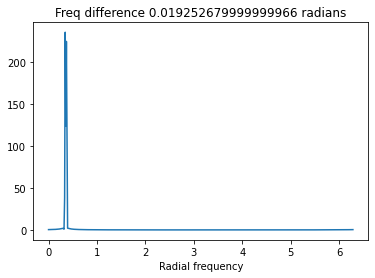

In [9]:
%matplotlib inline
v = np.arange(np.pi/9 + 0.05925268,np.pi/9,-0.02)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                  #L = 512 specimens
    dft = np.fft.fft(y)
    plt.figure(i)
    plt.plot(f,abs(dft))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


Text(0.5, 1.0, 'DFT of y')

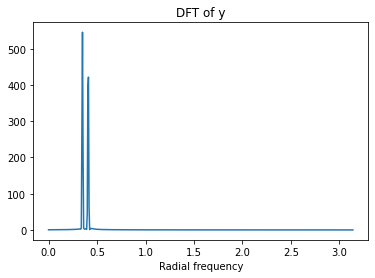

In [10]:
%matplotlib inline
L = 1024
w = np.hamming(L) #Hamming window of L specimens

ph1 = random.uniform(0,2*np.pi)
ph2 = random.uniform(0,2*np.pi)
v1 = np.pi/9
v2 = np.pi/9 + 0.05925268
A1 = 1
A2 = 0.9

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

y = w * (x1 + x2)
dft = np.fft.fft(y) #DFT of windowed signal x1 + x2

N = 1024   #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)

dft_cut = dft[:512] # for transparency of DFT
f_cut = f[:512]

plt.plot(f_cut,abs(dft_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

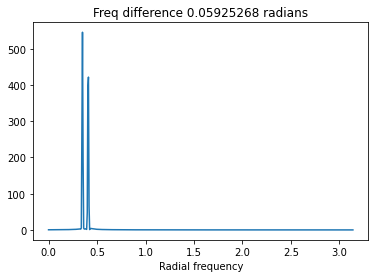

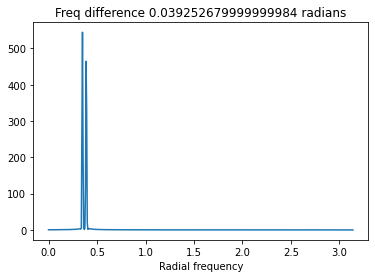

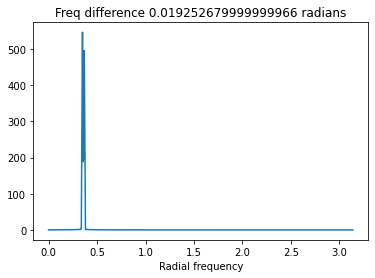

In [11]:
%matplotlib inline
v = np.arange(np.pi/9 + 0.05925268,np.pi/9,-0.02)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                  #L = 1024 specimens
    dft = np.fft.fft(y)
    
    dft_cut = dft[:512] # for transparency of DFT
    f_cut = f[:512]
    
    plt.figure(i)
    plt.plot(f_cut,abs(dft_cut))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


Query 1.4

Text(0.5, 1.0, 'DFT of y')

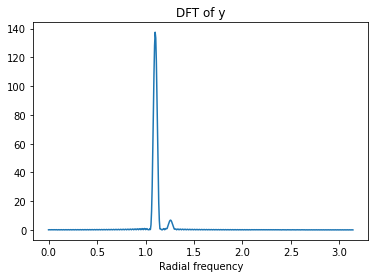

In [12]:
%matplotlib inline
L = 256

ph1 = random.uniform(0,2*np.pi)
ph2 = random.uniform(0,2*np.pi)
v1 = 0.35*np.pi
v2 = 0.4*np.pi
A1 = 1
A2 = 0.05

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

w = np.hamming(L) #Hamming window of L specimens

y = w * (x1 + x2)
y_pad2 = np.concatenate((y, np.zeros(768,)), axis=None) #zero padding, 1024 specimens
    
dft = np.fft.fft(y_pad2) #DFT of windowed signal x1 + x2

N = 1024   #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)

dft_cut = dft[:512] # for transparency of DFT
f_cut = f[:512]

plt.plot(f_cut,abs(dft_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

Text(0.5, 1.0, 'DFT of y')

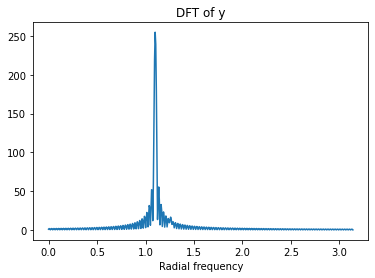

In [13]:
%matplotlib inline
w = np.ones(L,) #rectangular window of L specimens

y = w * (x1 + x2)
y_pad2 = np.concatenate((y, np.zeros(768,)), axis=None) #zero padding, 1024 specimens
    
dft = np.fft.fft(y_pad2) #DFT of windowed signal x1 + x2

N = 1024   #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)

dft_cut = dft[:512] # for transparency of DFT
f_cut = f[:512]

plt.plot(f_cut,abs(dft_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

Code for second exercise

Query 2.1

In [3]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf

In [4]:
n = np.arange(0,1000,1) # 1000 specimens

d0 = np.sin(0.7217*n) + np.sin(1.0247*n)
d1 = np.sin(0.5346*n) + np.sin(0.9273*n)
d2 = np.sin(0.5346*n) + np.sin(1.0247*n)
d3 = np.sin(0.5346*n) + np.sin(1.1328*n)
d4 = np.sin(0.5906*n) + np.sin(0.9273*n)
d5 = np.sin(0.5906*n) + np.sin(1.0247*n)
d6 = np.sin(0.5906*n) + np.sin(1.1328*n)
d7 = np.sin(0.6535*n) + np.sin(0.9273*n)
d8 = np.sin(0.6535*n) + np.sin(1.0247*n)
d9 = np.sin(0.6535*n) + np.sin(1.1328*n)

sd.play(d9,8192)

Query 2.2

94 94 163 163
104 104 163 163


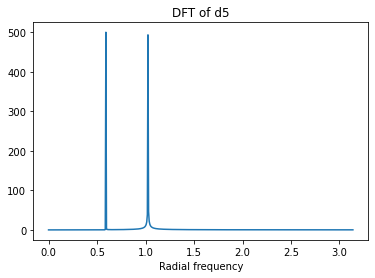

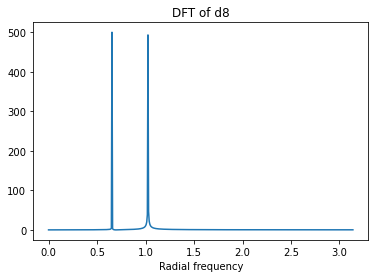

In [5]:
%matplotlib inline
dft5 = np.fft.fft(d5)
dft8 = np.fft.fft(d8)

f = np.linspace(0,2*np.pi,1000)

dft5_cut = dft5[:500]
dft8_cut = dft8[:500]
f_cut = f[:500]

plt.figure(1)
plt.plot(f_cut,np.abs(dft5_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of d5')
print(np.argmax(np.abs(dft5_cut[:131])),round((0.5906/(2*np.pi))*1000),np.argmax(np.abs(dft5_cut[131:]))+131,round((1.0247/(2*np.pi))*1000))
plt.figure(2)
plt.plot(f_cut,np.abs(dft8_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of d8')
print(np.argmax(np.abs(dft8_cut[:131])),round((0.6535/(2*np.pi))*1000) ,np.argmax(np.abs(dft8_cut[131:]))+131,round((1.0247/(2*np.pi))*1000))

Query 2.3

In [6]:
#   03119024
# + 03119858
# ----------
#   06238882

z = np.zeros(100,)

t = np.concatenate((d0,z,d6,z,d2,z,d3,z,d8,z,d8,z,d8,z,d2), axis = None)

sf.write('tone_sequence.wav',t,8192)
sd.play(t,8192)

Query 2.4

Text(0.5, 1.0, 'DFT of t5 windowed with Hamming')

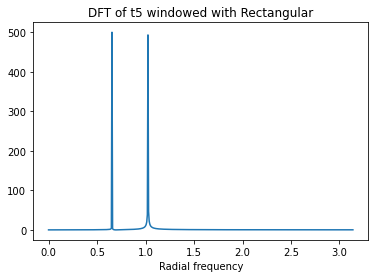

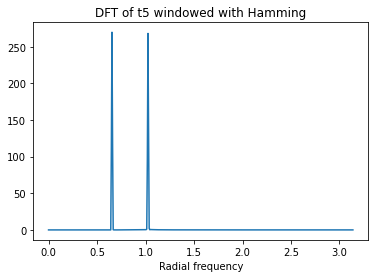

In [7]:
WR = np.ones(1000,)   # Rectangular window of 1000 specimens
WH = np.hamming(1000) # Hamming window of 1000 specimens

t1 = t[:1000]
t2 = t[1100:2100]
t3 = t[2200:3200]
t4 = t[3300:4300]
t5 = t[4400:5400]   # Equal to tones 7 and 8
t8 = t[7700:8700]

dft1R = np.fft.fft(t1*WR)
dft2R = np.fft.fft(t2*WR)
dft3R = np.fft.fft(t3*WR)
dft4R = np.fft.fft(t4*WR)
dft5R = np.fft.fft(t5*WR)
dft8R = np.fft.fft(t8*WR)

dft1H = np.fft.fft(t1*WH)
dft2H = np.fft.fft(t2*WH)
dft3H = np.fft.fft(t3*WH)
dft4H = np.fft.fft(t4*WH)
dft5H = np.fft.fft(t5*WH)
dft8H = np.fft.fft(t8*WH)

#Comparison of the 2 windows
dft5R_cut = dft5R[:500]
dft5H_cut = dft5H[:500]
f_cut = f[:500]

plt.figure(1)
plt.plot(f_cut,np.abs(dft5R_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of t5 windowed with Rectangular')
plt.figure(2)
plt.plot(f_cut,np.abs(dft5H_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of t5 windowed with Hamming')

Query 2.5

In [8]:
V_Column = [0.9273,1.0247,1.1328]
V_Row = [0.5346, 0.5906, 0.6535, 0.7217]
DIGITS = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [0,0,0]])

Query 2.6

In [11]:
WH = np.hamming(1000) # Hamming window of 1000 specimens
def ttdecode(signIn):
    Vector = []  
    count = 0  
    P = 0
    while count <= signIn.size- 1000:
        tone = signIn[count:count+1000]
        tone_En = np.square(np.abs(np.fft.fft(WH*tone))) # Energy of Hamming windowed tone
        
        #Plot Tone
#         Tone_En_cut = tone_En[:500]
#         f = np.linspace(0,2*np.pi,1000)
#         f_cut = f[:500]
#         P = P + 1
#         plt.figure(P)
#         plt.plot(f_cut,Tone_En_cut)
#         plt.xlabel('Radial frequency')
#         plt.title('Energy of Tone')
        
        k_row = np.argmax(tone_En[:131])
        #print(k_row)
        v_row = (k_row/1000)*2*np.pi
        i = index_of_closest(V_Row,v_row)
        
        k_column = np.argmax(tone_En[131:500]) + 131
        #print(k_column)
        v_column = (k_column/1000)*2*np.pi
        j = index_of_closest(V_Column,v_column)
        
        digit = DIGITS[i,j]
        Vector.append(digit) 
        count = count + 1100
    return Vector

def index_of_closest(List,value):
    Diff = [abs(L - value) for L in List]
    Min = min(Diff)
    Index = Diff.index(Min)
    return Index

Sum_of_AM = ttdecode(t)
print(Sum_of_AM)

[0, 6, 2, 3, 8, 8, 8, 2]


Query 2.7

In [14]:
S = np.load('easy_sig.npy')
H = np.load('hard_sig.npy')
print(ttdecode(S))
print(ttdecode(H))
print(ttdecode(H[-1000:]))
print(H.size)


[7, 3, 5, 8, 2, 8, 0, 2]
[4, 3, 5, 6, 6, 2, 0, 9, 9, 5]
[5]
11250


Code for third exercise

Query 3.1

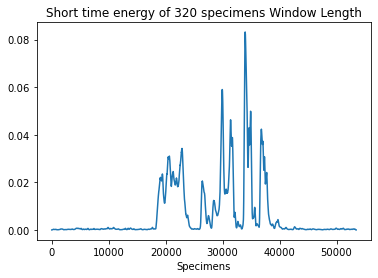

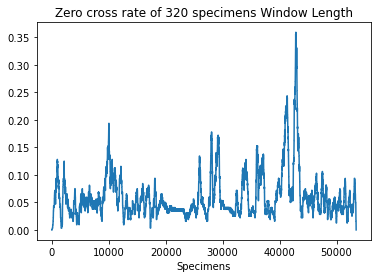

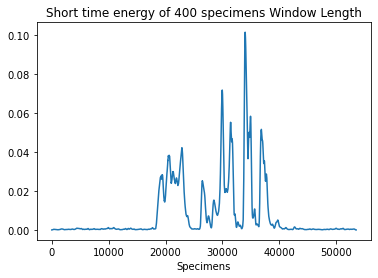

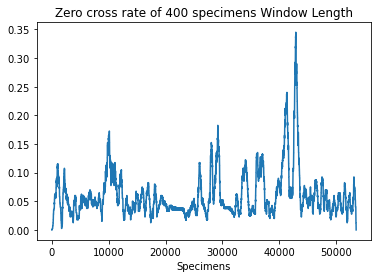

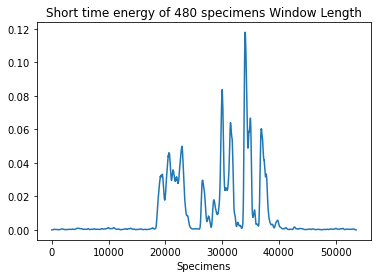

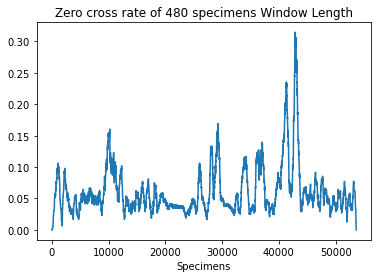

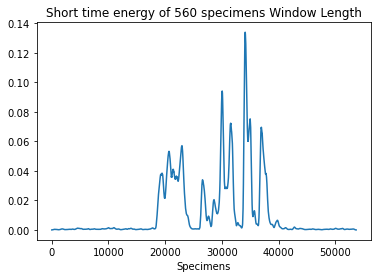

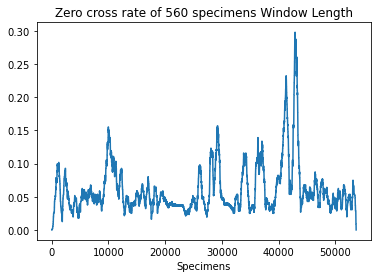

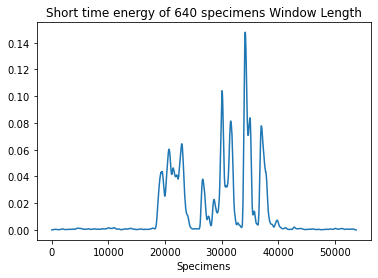

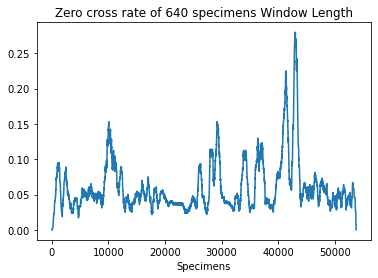

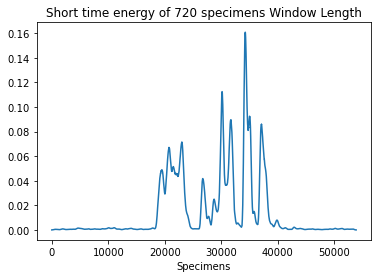

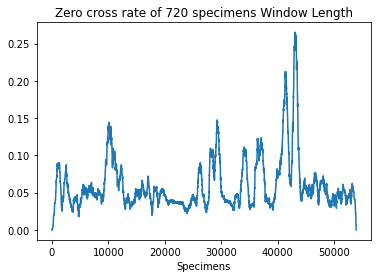

In [39]:
speech, f1 = sf.read('speech_utterance.wav')
Window_Length = np.arange(round(0.02*f1),round(0.05*f1),5*16) # Window Length in specimens corresponding to values between 20 - 50 ms

i = 0
for N in Window_Length:
    WH = np.hamming(N)
    En = np.convolve(np.square(np.abs(speech)),WH,'full')
    n = np.arange(0,np.size(En),1)
    i = i + 1
    plt.figure(i)
    plt.plot(n,En)
    plt.xlabel('Specimens')
    plt.title('Short time energy of ' + str(N) + ' specimens Window Length')
    
    WR = 1/(2*N)*np.ones(N,)
    Zn = np.convolve(np.abs(np.sign(speech[1:]) - np.sign(speech[:-1])),WR,'full')
    n = np.arange(0,np.size(Zn),1)
    i = i + 1
    plt.figure(i)
    plt.plot(n,Zn)
    plt.xlabel('Specimens')
    plt.title('Zero cross rate of ' + str(N) + ' specimens Window Length')
    
    

Query 3.2

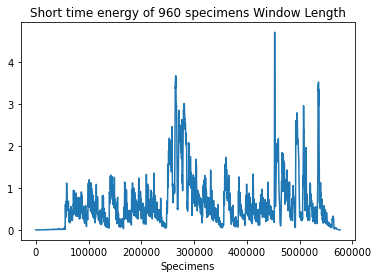

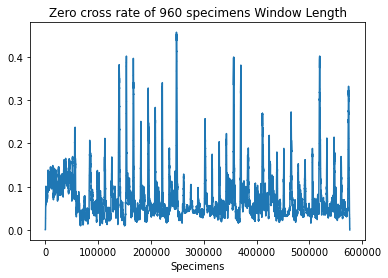

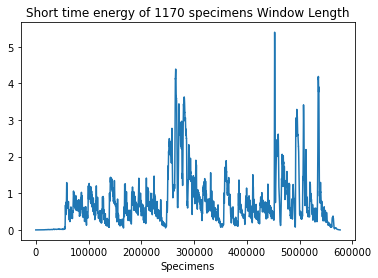

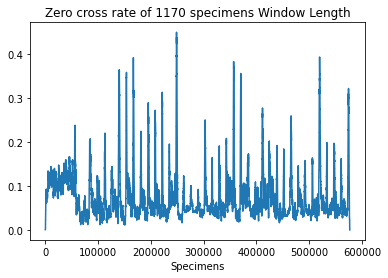

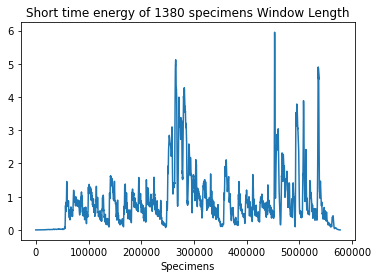

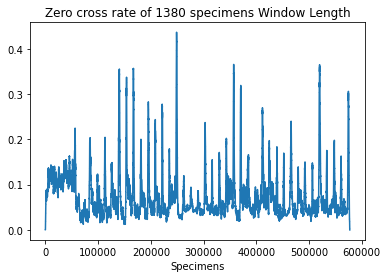

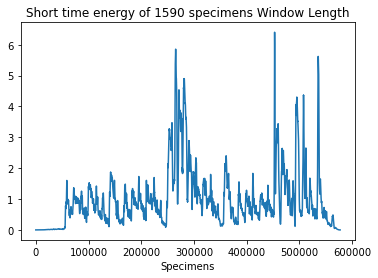

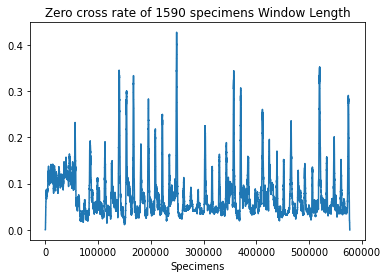

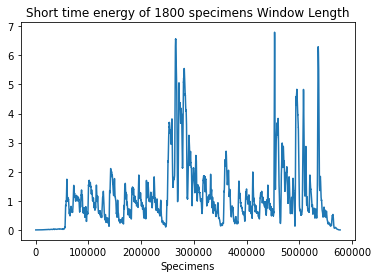

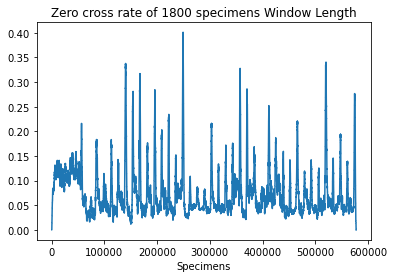

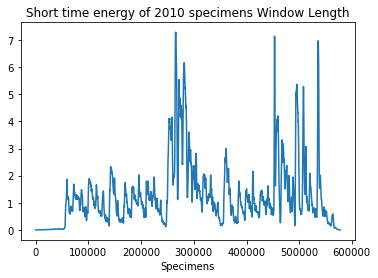

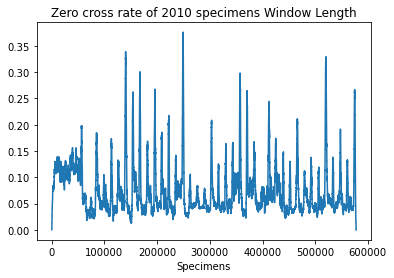

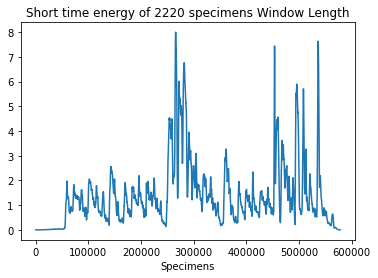

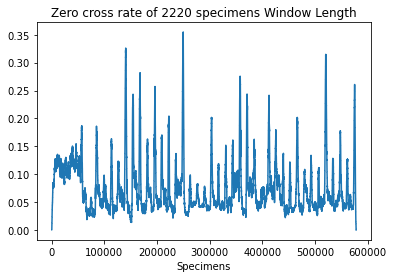

In [45]:
music_stereo, f2 = sf.read('music.wav')
music_mono = music_stereo[:,0]/2 + music_stereo[:,1]/2
Window_Length = np.arange(round(0.02*f2),round(0.05*f2),5*42) # Window Length in specimens corresponding to values between 20 - 50 ms

i = 0
for N in Window_Length:
    WH = np.hamming(N)
    En = np.convolve(np.square(np.abs(music_mono)),WH,'full')
    n = np.arange(0,np.size(En),1)
    i = i + 1
    plt.figure(i)
    plt.plot(n,En)
    plt.xlabel('Specimens')
    plt.title('Short time energy of ' + str(N) + ' specimens Window Length')
    
    WR = 1/(2*N)*np.ones(N,)
    Zn = np.convolve(np.abs(np.sign(music_mono[1:]) - np.sign(music_mono[:-1])),WR,'full')
    n = np.arange(0,np.size(Zn),1)
    i = i + 1
    plt.figure(i)
    plt.plot(n,Zn)
    plt.xlabel('Specimens')
    plt.title('Zero cross rate of ' + str(N) + ' specimens Window Length')
    